<a href="https://www.kaggle.com/code/yasinsoylu123/hand-prediction?scriptVersionId=97856323" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import matplotlib.pylab as plt

import pandas as pd # data processing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import tensorflow as tf 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization, Dropout
from keras.layers import Dense, Activation
from tensorflow import keras


from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB


plt.rcParams["figure.figsize"] = (16,10) #Make the plots bigger by default
plt.rcParams["lines.linewidth"] = 2 #Setting the default line width
plt.style.use("ggplot")

In [2]:
df0 = pd.read_csv("../input/emg-4/0.csv", header=None )
df1 = pd.read_csv("../input/emg-4/1.csv", header=None )
df2 = pd.read_csv("../input/emg-4/2.csv", header=None )
df3 = pd.read_csv("../input/emg-4/3.csv", header=None )
df = pd.concat([df0,df1,df2,df3], axis = 0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


# rock = 0,
# scissors = 1
# paper = 2,
# ok =3. 

In [3]:
x = df.loc[:,0:63]
y = df[64]

In [4]:
y.unique()

array([0, 1, 2, 3])

In [5]:
x = np.array(x)
y= np.array(y)

In [6]:
x = x.reshape(x.shape[0]*x.shape[1], 1)


In [7]:
sc = StandardScaler()
x = sc.fit_transform(x)


In [8]:
x = x.reshape((-1, 8, 8))


In [9]:
print("All Data size X and y")
print(x.shape)
print(y.shape)

All Data size X and y
(11678, 8, 8)
(11678,)


In [10]:
y = np.eye(np.max(y) + 1)[y]


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42,stratify=y)

In [12]:
print("All Data size X and y")
print(x_train.shape)
print(y_train.shape)

All Data size X and y
(8758, 8, 8)
(8758, 4)


In [13]:
print("Test Data size X and y")
print(x_test.shape)
print(y_test.shape)

Test Data size X and y
(2920, 8, 8)
(2920, 4)


In [14]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 8)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 64))
model.add(Dense(units = 128))

model.add(Dense(units = 4, activation="softmax"))
model.compile(optimizer = "adam" , loss = "binary_crossentropy", metrics=["accuracy"])


model.summary()



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8, 50)             11800     
_________________________________________________________________
dropout (Dropout)            (None, 8, 50)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 8, 50)             20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 8, 50)             20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [15]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)


In [16]:
history=model.fit(x_train, y_train, epochs = 250, batch_size = 32, verbose=2 , callbacks=[callback],validation_split=0.2,)


2022-06-09 00:35:45.132713: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/250
219/219 - 17s - loss: 0.4192 - accuracy: 0.4966 - val_loss: 0.2946 - val_accuracy: 0.7357
Epoch 2/250
219/219 - 7s - loss: 0.1822 - accuracy: 0.8574 - val_loss: 0.1093 - val_accuracy: 0.9235
Epoch 3/250
219/219 - 8s - loss: 0.1003 - accuracy: 0.9295 - val_loss: 0.0833 - val_accuracy: 0.9412
Epoch 4/250
219/219 - 7s - loss: 0.0815 - accuracy: 0.9483 - val_loss: 0.0847 - val_accuracy: 0.9435
Epoch 5/250
219/219 - 7s - loss: 0.0656 - accuracy: 0.9566 - val_loss: 0.0595 - val_accuracy: 0.9532
Epoch 6/250
219/219 - 7s - loss: 0.0610 - accuracy: 0.9625 - val_loss: 0.0575 - val_accuracy: 0.9555
Epoch 7/250
219/219 - 7s - loss: 0.0558 - accuracy: 0.9659 - val_loss: 0.0792 - val_accuracy: 0.9555
Epoch 8/250
219/219 - 7s - loss: 0.0525 - accuracy: 0.9632 - val_loss: 0.0587 - val_accuracy: 0.9635
Epoch 9/250
219/219 - 7s - loss: 0.0445 - accuracy: 0.9719 - val_loss: 0.0483 - val_accuracy: 0.9646
Epoch 10/250
219/219 - 7s - loss: 0.0454 - accuracy: 0.9717 - val_loss: 0.0539 - val_accur

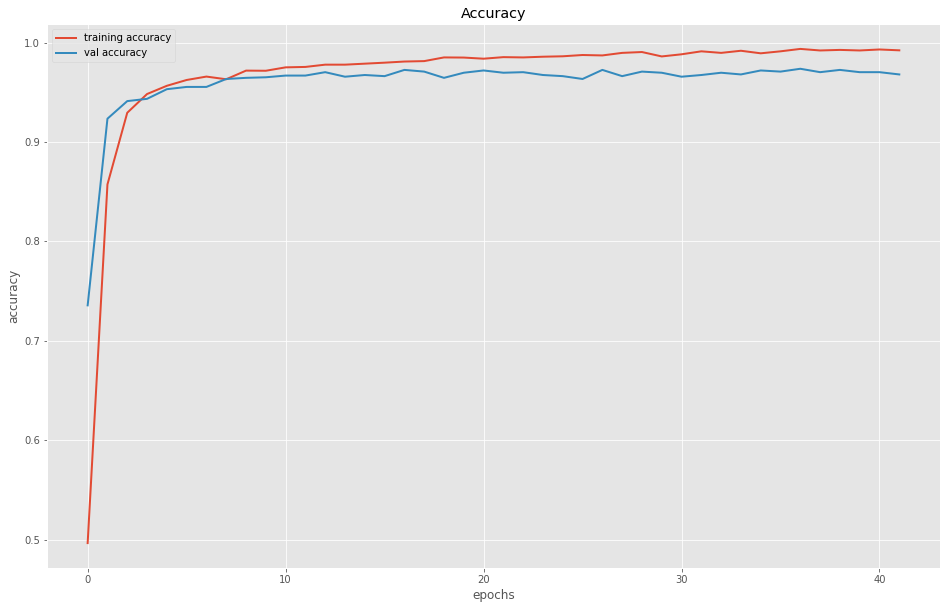

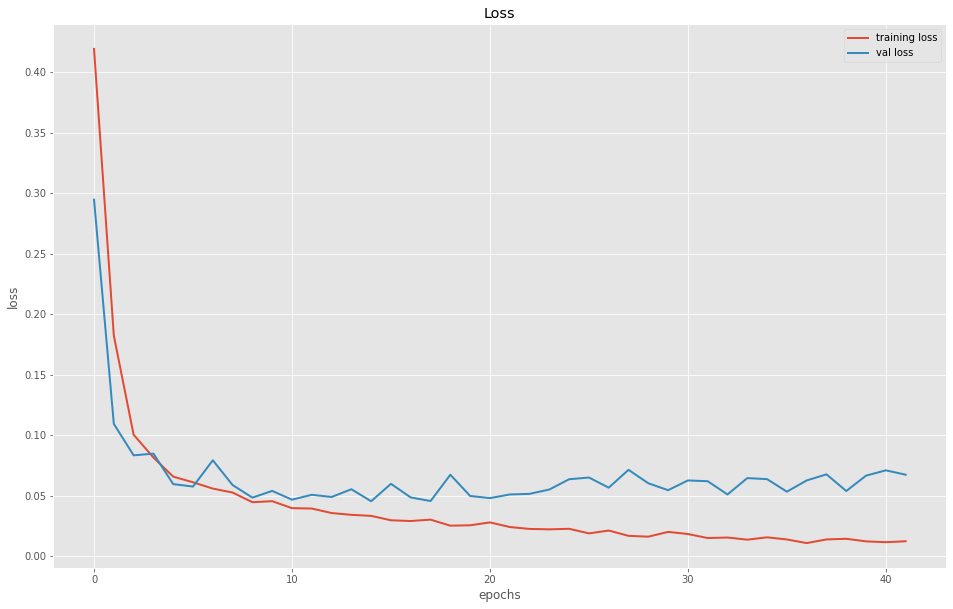

In [17]:
plt.figure(0)

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [18]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 

In [19]:
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix

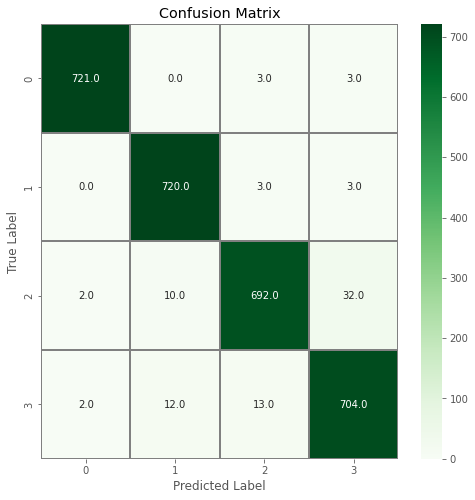

In [20]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [21]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       727
           1       0.97      0.99      0.98       726
           2       0.97      0.94      0.96       736
           3       0.95      0.96      0.96       731

    accuracy                           0.97      2920
   macro avg       0.97      0.97      0.97      2920
weighted avg       0.97      0.97      0.97      2920

